In [3]:
# Import necessary libraries
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [4]:
# read “amazon_alexa.tsv” file.
data = pd.read_csv('amazon_alexa.tsv', delimiter= '\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
# we will read the “verified_reviews” column.
amazon = data['verified_reviews']
amazon

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [6]:
# perform operattions to remove symbols, special characters, spaces, numbers
# first we will check if there are NaN values.
amazon.isnull().sum()

0

In [7]:
r=0
blanks = []

for i in data['verified_reviews']:
    if i.isspace():
        blanks.append(r)
    r=r+1
blanks

[85,
 183,
 219,
 374,
 406,
 524,
 654,
 780,
 878,
 914,
 1094,
 1112,
 1119,
 1150,
 1151,
 1275,
 1321,
 1354,
 1360,
 1385,
 1389,
 1420,
 1447,
 1461,
 1513,
 1558,
 1577,
 1581,
 1614,
 1728,
 1761,
 1764,
 1808,
 1954,
 1975,
 1981,
 1987,
 2014,
 2019,
 2032,
 2037,
 2048,
 2073,
 2104,
 2107,
 2131,
 2141,
 2187,
 2197,
 2221,
 2244,
 2359,
 2430,
 2455,
 2510,
 2525,
 2567,
 2627,
 2628,
 2662,
 2732,
 2763,
 2769,
 2772,
 2775,
 2790,
 2806,
 2861,
 2876,
 2918,
 2978,
 2979,
 3013,
 3083,
 3114,
 3120,
 3123,
 3126,
 3141]

In [8]:
# remove all the empty cells
data.drop(blanks, inplace=True)
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
# clean the data.
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())
data['cleaned_data'] = data['verified_reviews'].apply(clean_data)

In [10]:
# printing the new data after removing NaN values and empty cells.
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Only complaint I have is that the sound qualit...


In [11]:
# perform drop number function and the printing the data
def drop_numers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)
data['cleaned_data'] = data['cleaned_data'].apply(drop_numers)

In [12]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My yr...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,I do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Only complaint I have is that the sound qualit...


In [13]:
# Convert to lower case
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)
data['cleaned_data'] = data['cleaned_data'].apply(lower_case)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# print the data after converting it to lower case.
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [15]:
# Lemmetize/stem
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)
data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)

In [17]:
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my yr ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kid adult and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching location checking...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these thing i have them running my e...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [18]:
# remove stop words
nltk.download('stopwords')

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text
data['cleaned_data'] = data['cleaned_data'].apply(remove_stopword)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# print our data after removing stop words.
data

,rating,date,variation,verified_reviews,feedback,cleaned_data
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaur control l...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kid adult everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening music searching location checking ti...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,love thing running entire home tv light thermo...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,complaint sound quality great mostly use comma...


Text(0.5, 1.0, 'Top 20 words based on frequency')

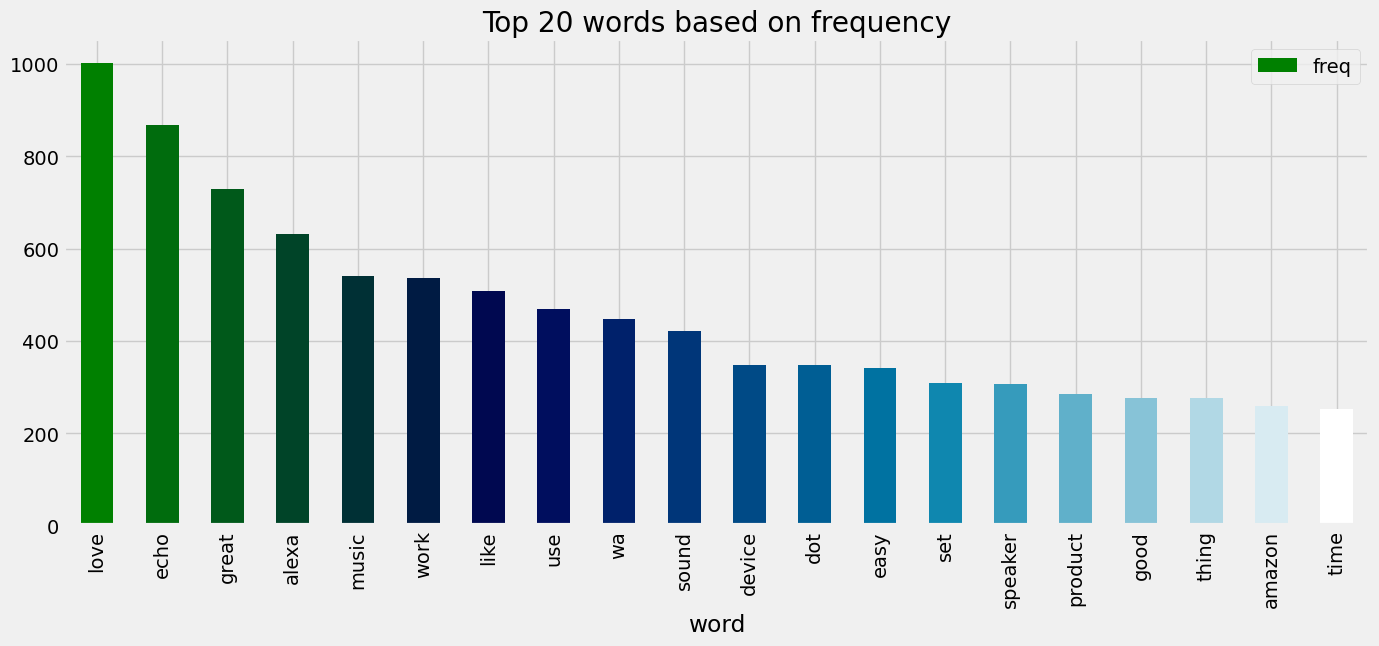

In [39]:
# visualize the Most Frequent Words.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer(stop_words= 'english')
words = cv.fit_transform(data.cleaned_data)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title('Top 20 words based on frequency')

In [45]:
# calculate the polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol>0.1 and pol<=1):
        return 'Positive'
    elif(pol>-1 and pol<=-0.1):
        return 'Negative'
data['polarity'] = data['cleaned_data'].apply(get_polarity)

<AxesSubplot:>

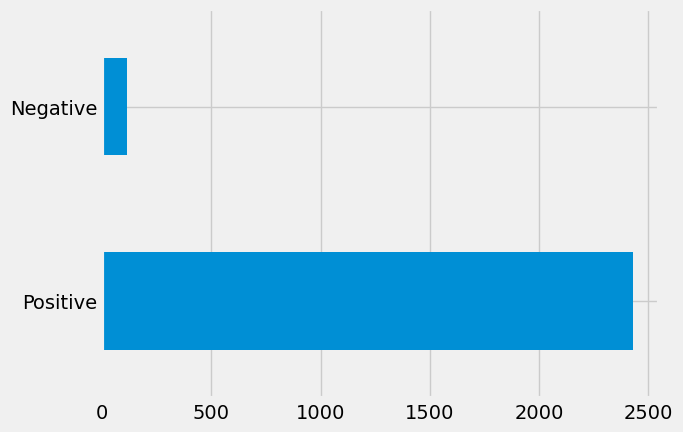

In [46]:
data['polarity'].value_counts().plot(kind='barh')

In [47]:
data['polarity'].value_counts()

Positive    2427
Negative     112
Name: polarity, dtype: int64